In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf


# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.sample()

,Age,Tardies
3,21,9


Draw a dispersion diagram (scatter plot) for the data.

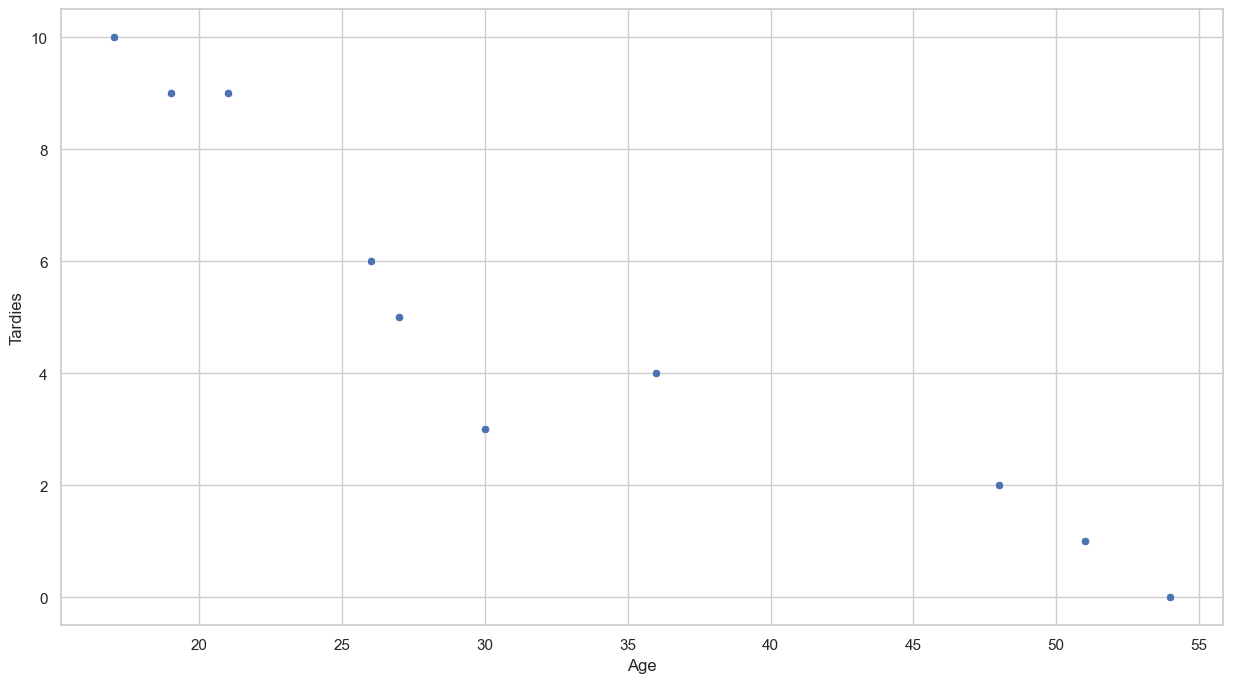

In [3]:
sns.scatterplot(data = student_data, y = "Tardies", x = "Age");

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# They seem to be correlated, the higher the age the lesser the Tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
correlation = student_data.corr()
covariance = student_data.cov()
correlation, covariance

# Both negative. It represents that the higher the age the lesser the Tardies
# Covariance depends on the magnitude of the values, while correlation is normalised and has values from -1 to 1.

(              Age   Tardies
 Age      1.000000 -0.939163
 Tardies -0.939163  1.000000,
                 Age    Tardies
 Age      187.655556 -45.566667
 Tardies  -45.566667  12.544444)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Outcome variable, dependant variable
y = student_data.Tardies
# Independent variable
X = student_data[["Age"]]
# Both variables are numerical, and they seem to follow a line -> Linear regression
lr = LinearRegression()
lr.fit(X, y)
# Equation:
student_data["predicted_Tardies"] = student_data.Age * lr.coef_[0] + lr.intercept_

Plot your regression model on your scatter plot.

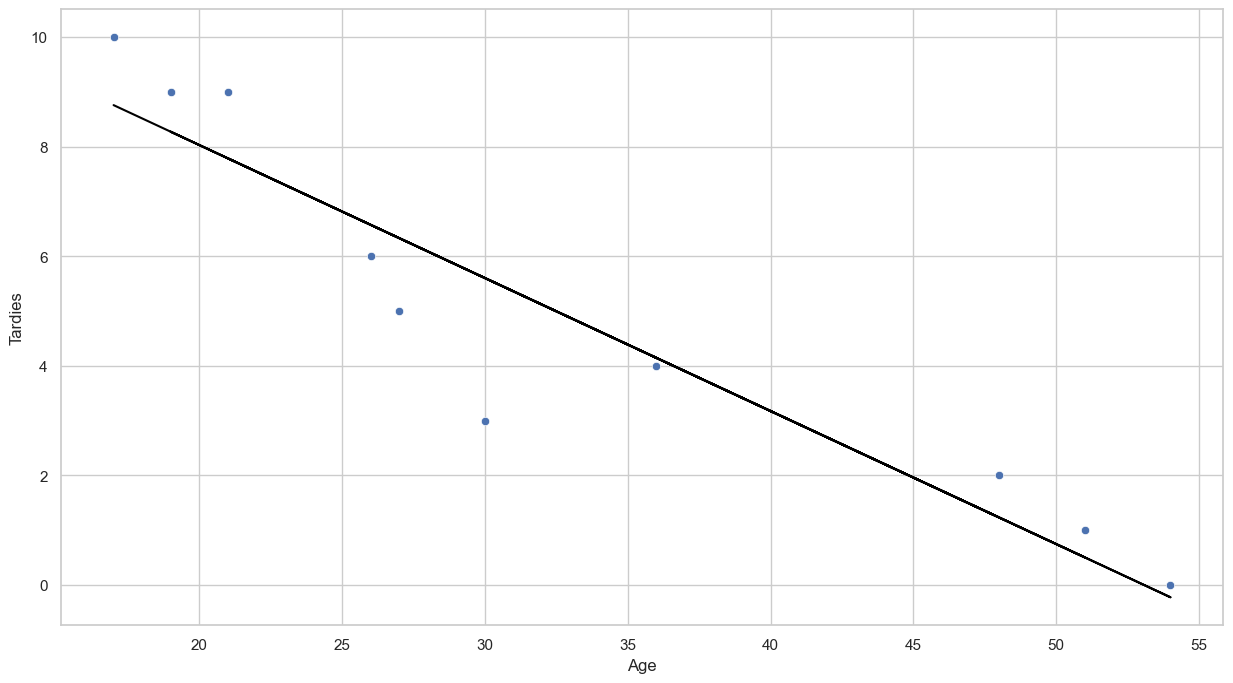

In [7]:
sns.scatterplot(data = student_data, y = "Tardies", x = "Age")
plt.plot(student_data.Age, student_data.predicted_Tardies, c="black");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# It seems a good predictor, but the size of the sample is very small
# It seems a good predicor but there might be more factors that could affect this relationship.
# But with the available data, I'm checking the metrics of the model:
result = smf.ols("Tardies ~ Age", data = student_data).fit()
result.summary()
# R2: 0.8 and both the intercept and the age are significant to the model

C:\Users\gdcma\miniconda3\envs\ironhack\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        16:45:41   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
33542,Toyota,T100 2WD,1997,3.4,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,20.600625,15,18,16,555.4375,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
correlation_year = vehicles["Year"].corr(vehicles["CO2 Emission Grams/Mile"])
correlation_cylinders = vehicles["Cylinders"].corr(vehicles["CO2 Emission Grams/Mile"])
correlation_barrels = vehicles["Fuel Barrels/Year"].corr(vehicles["CO2 Emission Grams/Mile"])
correlation_mpg = vehicles["Combined MPG"].corr(vehicles["CO2 Emission Grams/Mile"])
correlation_cost = vehicles["Fuel Cost/Year"].corr(vehicles["CO2 Emission Grams/Mile"])
pd.DataFrame(
    [{"correlation_year": correlation_year,
     "correlation_cylinders": correlation_cylinders,
     "correlation_barrels": correlation_barrels,
     "correlation_mpg": correlation_mpg,
     "correlation_cost": correlation_cost
    }])
# The variables with the highest correlataion with CO2 Emission Grams/Mile is Fuel Barrels/Year, it being positive
# followed by Fuel Cost/Year, Combined MPG (negative correlation), Cylinders and lastly Year

,correlation_year,correlation_cylinders,correlation_barrels,correlation_mpg,correlation_cost
0,-0.2223,0.752393,0.986189,-0.926229,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

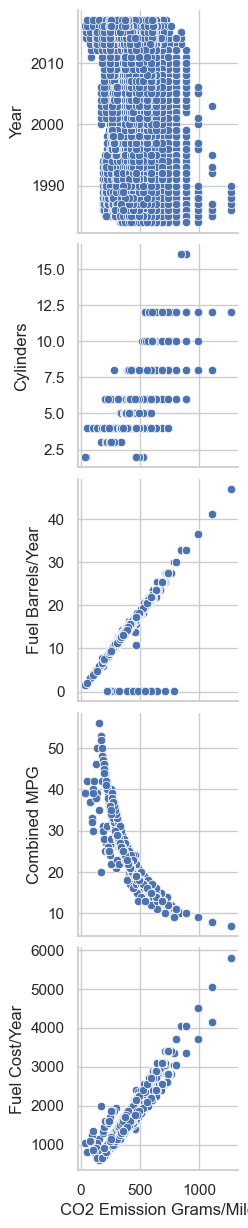

In [11]:
# These variables are numeric, 
sns.pairplot(data = vehicles, x_vars="CO2 Emission Grams/Mile", y_vars=["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]);
# The scatterplot for year and CO2 Emission Grams/Mile is a point cloud, seems to show a slight negative linear correlation
# Cylinders, Fuel Barrels/Year, Fuel Cost/Year have a positive lienar correlation with CO2 Emission Grams/Mile
# Combined MPG showa a negative corrlation with CO2 Emission Grams/Mile, but the shape is not linear

# We are going to use linear regression as it fits for most of the variables, and check if it's a good model through the metrics

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [12]:
results_1 = smf.ols("vehicles['CO2 Emission Grams/Mile'] ~ Year + Cylinders + vehicles['Fuel Barrels/Year'] + vehicles['Combined MPG'] + vehicles['Fuel Cost/Year']", data = vehicles).fit()
results_1.summary()

# All the variables explain the variance of CO2 Emission Grams/Mile through this model.
# It's very well fitted, this model explains 98.1% of the variance (R-squared)
# Cylinders, Fuel Barrels/Year and Fuel Cost/Year have a possitive coeficient. When they increase the CO2 Emission Grams/Mile increases
# Year and Combined MPG have a negative coefficient. When they increase the CO2 Emission Grams/Mile decreases

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vehicles['CO2 Emission Grams/Mile']   R-squared:                       0.981
Model:                                             OLS   Adj. R-squared:                  0.981
Method:                                  Least Squares   F-statistic:                 3.687e+05
Date:                                 Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                                         16:45:42   Log-Likelihood:            -1.5173e+05
No. Observations:                                35952   AIC:                         3.035e+05
Df Residuals:                                    35946   BIC:                         3.035e+05
Df Model:                                            5                                         
Covariance Type:                             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       769.8883     19.392     39.702      0.000     731.880     807.897
Year                             -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders                         1.8788      0.083     22.598      0.000       1.716       2.042
vehicles['Fuel Barrels/Year']    19.0529      0.061    311.600      0.000      18.933      19.173
vehicles['Combined MPG']         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
vehicles['Fuel Cost/Year']        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [30]:
lr.coef_[0]

0.6842105263157894

In [31]:
y = df.Y
X = df[["X"]]
lr.fit(X, y)
df["predicted_y"] = df.X * lr.coef_[0] + lr.intercept_

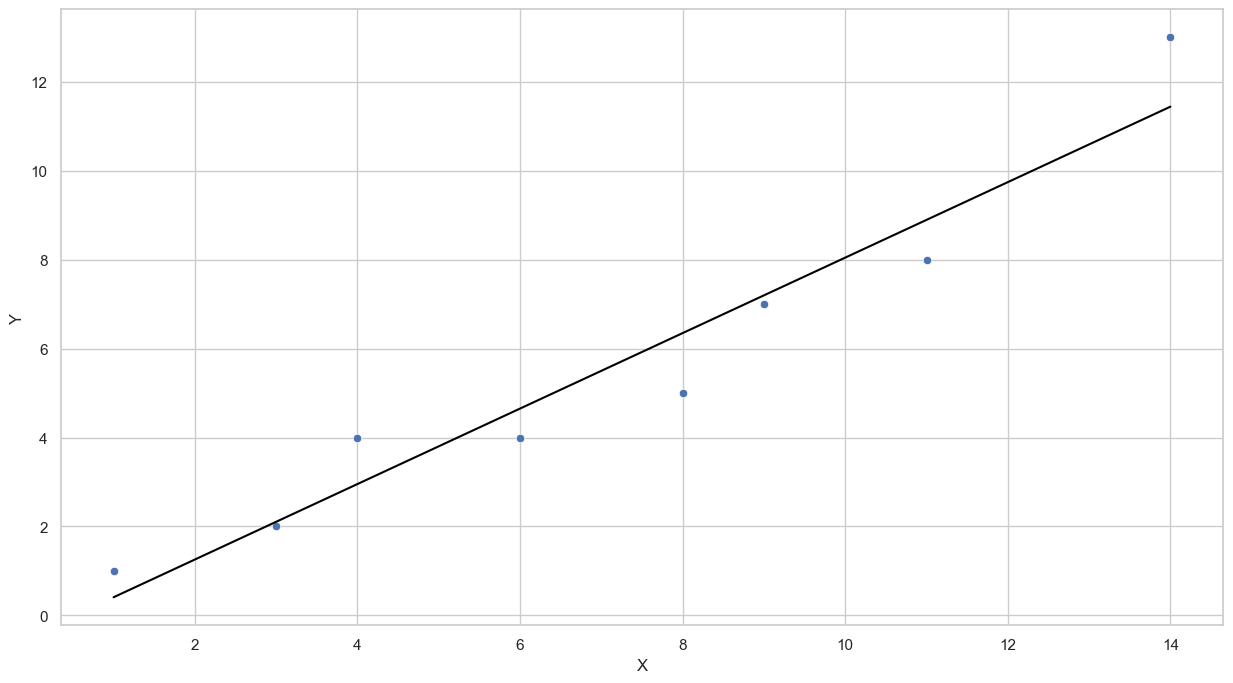

In [32]:
sns.scatterplot(x = df.X, y =df.Y)
plt.plot(df.X, df.predicted_y, c="black");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [33]:
df
# As the number of invites increases the number of attendees increases but not 1 to 1,
# that's why this person feels less people are comming, becuase the increase in atendees is "slower" than the increase in invites

,X,Y,predicted_y
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


In [34]:
lr.coef_[0] # The coef is less than 1, as the number of invites increases the number of attendees increases but not 1 to 1

0.8484848484848485

In [35]:
lr.intercept_

-0.43939393939393945

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

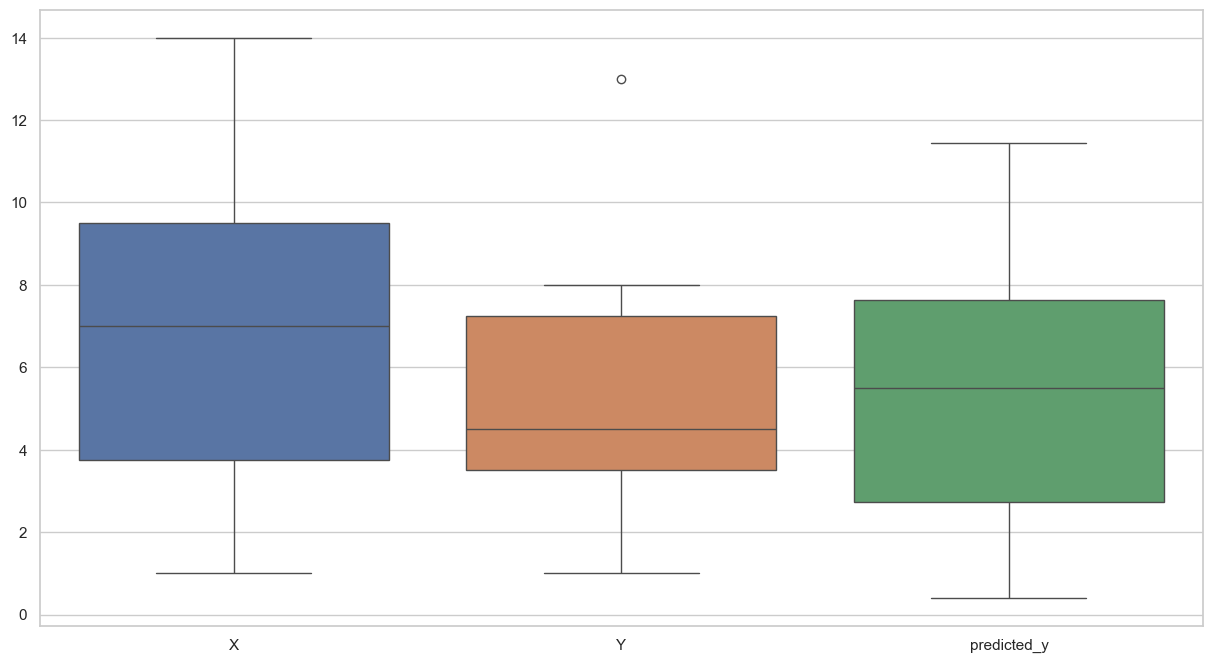

In [19]:
sns.boxplot(df)

In [20]:
df_noOutliers = df.drop(df.loc[df.Y == df.Y.max()].index)

In [21]:
y = df_noOutliers.Y
X = df_noOutliers[["X"]]
lr.fit(X, y)
df_noOutliers["predicted_y_noOutliers"] = df_noOutliers.X * lr.coef_[0] + lr.intercept_

In [22]:
df_noOutliers # The first value is higher than one (which might give this person the impression that people are comming always)

,X,Y,predicted_y,predicted_y_noOutliers
0,1,1,0.409091,1.007519
1,3,2,2.106061,2.375940
2,4,4,2.954545,3.060150
3,6,4,4.651515,4.428571
4,8,5,6.348485,5.796992
5,9,7,7.196970,6.481203
6,11,8,8.893939,7.849624


In [26]:
lr.coef_ 

array([0.68421053])

In [28]:
lr.intercept_

0.32330827067669254

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [24]:
# The coeficient is smaller now, so people attending now increase less while increasing the invitations

# The intercept is much higher, meaning that for this person is even more confusing, as the starting point is not bad,
# even with 0 theoretical invitations

# The outlier was just a lucky occurence of inviting people and them comming, making the trend seem more possitive than it is.